# Deep Learning
<b>Deep learning</b> is a subfield of machine learning, which is a set of algorithms like Artificial Neural Networks (ANN), Convolutional Neural Networks (CNN). They are inspired by the structure and function of the brain.

<b>Perceptron</b> is the most simple neural network and represents a "neuron".

<p>Seven components to artificial neurons:</p>
<ol>
<li><b>Input nodes</b>: Each input node is associated with a numerical value</li>
<li><b>Connections</b>: Each connections departing from an input node has a weight associated to it</li>
<li><b>weighted sum</b>: All the values of the input nodes and weights of the connections are brought together</li>
<li><b>activation function</b>: The result of the sum will be the input to the activation function</li> 
<li><b>Treshold</b>: Artificial neuron will also only fire when the sum of the inputs exceeds a treshold</li>
<li><b>Output node</b>: Associated with the function of the weighted sum of the input nodes</li>
<li><b>Bias</b>:allows you to shift the activation function to the left or right</li>
</ol>

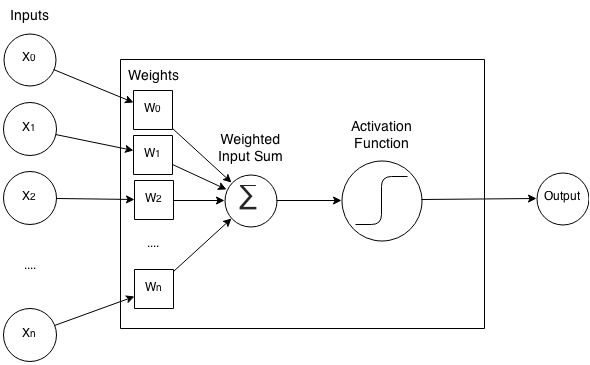

In [35]:
from IPython.display import Image
Image(filename='image/SimplePerceptronDiagram.png')

<b>Source</b>:www.vilipetek.com/2015/02/12/binary-perceptron-in-c/

### Keras Tutorial
Keras is a recommended library for deep learning in Python 

+ Source: https://www.datacamp.com/community/tutorials/deep-learning-python
+ Source: https://elitedatascience.com/keras-tutorial-deep-learning-in-python

#### Notebook runs on Python3 

From Python 2 Enter in prompt:

+ conda create -n py36 python=3.6
+ source activate py36
+ conda install notebook ipykernel
+ ipython kernel install --user
##### Set up Environment

<ol>
<li>Python 3.5+</li>
<li>SciPy with NumPy</li>
<li>Matplotlib</li>
<li>Keras</li>
<li>Theano</li>
</ol>

### Install keras
+ pip install keras

### Data

In [1]:
# Import pandas 
import pandas as pd

#load diamond dataset into dataframe
data = pd.read_csv("diamonds.csv")


Kaggle dataset contains the prices and other attributes of almost 54,000 diamonds

<ol>
<li><b>price</b> in US dollars (\$326--\$18,823)</li>
<li><b>carat weight</b> of the diamond (0.2--5.01)</li>
<li><b>cut</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)</li>
<li><b>color</b> from J (worst) to D (best)</li>
<li><b>clarity</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))</li>
<li><b>x length</b> in mm (0--10.74)</li>
<li><b>y width</b> in mm (0--58.9)</li>
<li><b>z depth </b>in mm (0--31.8)</li>
<li><b>depth total</b> depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)</li>
<li>table width of <b>top of diamond</b> relative to widest point (43--95)</li>
</ol>

<b>Source<b>: https://www.kaggle.com/shivam2503/diamonds/data

In [2]:
#summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
#first 5 rows
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
#remove unnecessary column that are not of type float
import numpy as np
msk = data.dtypes == np.float64 
data2 = data.loc[:, msk]

In [7]:
#Check for null
data.isnull().values.any()

False

### Visualize Data

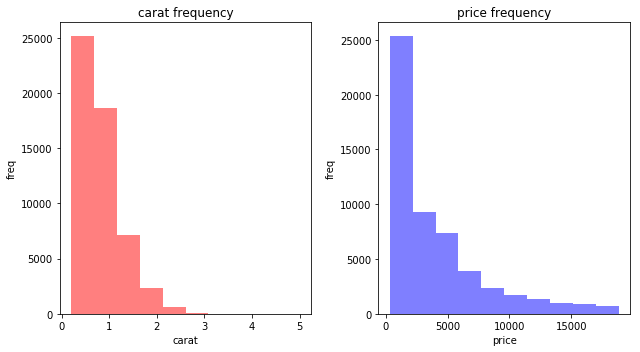

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9,5))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('carat')
ax1.set_ylabel('freq')
ax1.set_title("carat frequency")

plt.hist(data.carat, 10, facecolor='red', alpha=0.5)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('price')
ax2.set_ylabel('freq')
ax2.set_title('price frequency')

plt.hist(data.price, 10, facecolor='blue', alpha=0.5)

plt.tight_layout()
plt.show()

### Corelation Matrix

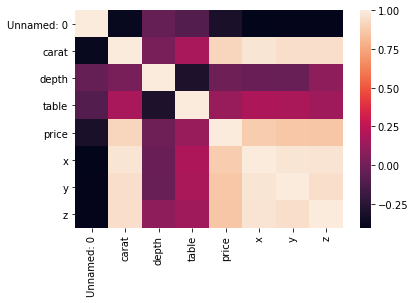

In [10]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

No correlation at all between depth and table. As we would expect there is a high corrlatio between the carat size and the price as well as all othermeasures to the dimesion of the diamond.

### Class Labels

In [11]:
#class labels object to int
data["Class"] = [str(ord(c)&31) for c in data.color]
data2["Class"] = [1 if int(row) >= 7 else 0 for row in data.Class]

data2.head()
np.ravel(data2.Class)

C:\Users\KVA\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


I divided the dataset of diamonds into two classes, '1' and '0' depdning on the color of the diamond. The color grade ranges from D to J with J being the worst. So I transformed them to numerical values and considered any value above or equal to 7 as '1' (bad) and the others would be '0' (good)

In [44]:
data2.groupby(['Class']).size()

Class
0    26114
1    27826
dtype: int64

Text(0,0.5,'Frequency [%]')

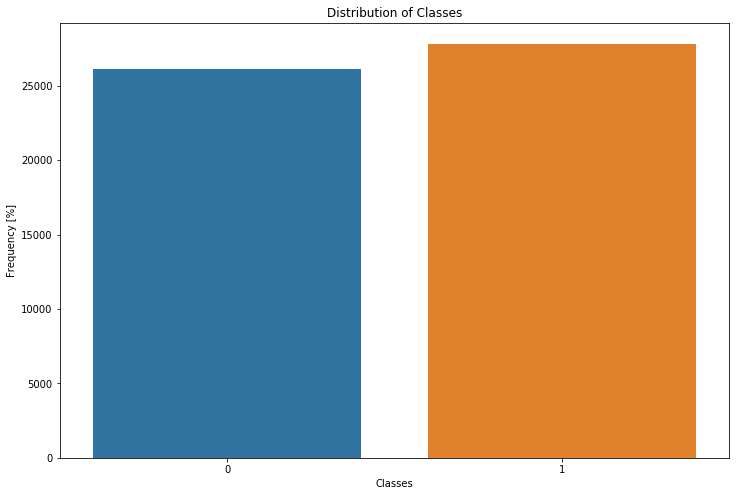

In [51]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Class", data=data2)
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency [%]')

The two classes are approximtely balanced in the data set with 26114 samples for class 0 and 2782 for class 1

### Keras Model

In [13]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
values = data.values
# Specify the data 
X= data2.iloc[:, 0:6].values.astype(np.float32) 

# Specify the target labels and flatten the array 
y=data2.Class.values.astype(np.int64)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [17]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(7, activation='relu', input_shape=(6,)))

# Add one hidden layer 
model.add(Dense(4, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Dense layer of size 1. The final layer uses a sigmoid activation functionso: output is a probability
<p>The result in a score between 0 and 1:how likely the sample is to have the target “1”, or how likely it is to be a bad diamond</p> 

## Model Data

In [18]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 7)                 49        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.26048762,  0.07751614, -0.64082432,  0.12165701,  0.32588875,
          0.48567176, -0.45066428],
        [-0.52282691, -0.60357022, -0.49163681,  0.22314233,  0.18704075,
         -0.2571252 , -0.59548175],
        [-0.27061647,  0.34324205, -0.17986044,  0.33745611, -0.64933181,
         -0.67149693, -0.24424896],
        [-0.2182616 , -0.42708048, -0.08461058, -0.14328063,  0.44805026,
          0.62340271, -0.46275675],
        [-0.27931672, -0.55779248,  0.58327937,  0.52287161, -0.65426552,
          0.47691798,  0.21468115],
        [-0.3830533 , -0.21868208, -0.15507883, -0.65081531,  0.35239434,
          0.24266326,  0.56170928]], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
 array([[ 0.48500592, -0.38479802,  0.71688765, -0.52192926],
        [ 0.6300773 ,  0.27103871, -0.09062666,  0.13402915],
        [-0.23755819,  0.48740345,  0.67605394, -0.73612934],
        [ 0.40114647, -0.21287018,  0.2518093 ,  0.6127587 ],
        [ 0.063

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
## fit model
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
36139/36139 [==============================] - 78s - loss: 0.6641 - acc: 0.5881    
Epoch 2/20
36139/36139 [==============================] - 77s - loss: 0.6609 - acc: 0.5917    
Epoch 3/20
36139/36139 [==============================] - 77s - loss: 0.6606 - acc: 0.5911    
Epoch 4/20
36139/36139 [==============================] - 78s - loss: 0.6605 - acc: 0.5925    
Epoch 5/20
36139/36139 [==============================] - 78s - loss: 0.6599 - acc: 0.5946    
Epoch 6/20
36139/36139 [==============================] - 81s - loss: 0.6596 - acc: 0.5925    
Epoch 7/20
36139/36139 [==============================] - 72s - loss: 0.6598 - acc: 0.5927    
Epoch 8/20
36139/36139 [==============================] - 73s - loss: 0.6592 - acc: 0.5915    
Epoch 9/20
36139/36139 [==============================] - 72s - loss: 0.6593 - acc: 0.5931    
Epoch 10/20
36139/36139 [==============================] - 70s - loss: 0.6592 - acc: 0.5942    
Epoch 11/20
36139/36139 [========================

It took approximately <b>25 min</b> to train the neural net. With an average of 80 sec per epoch for 20 epochs



### Predictions

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([[ 0.44470268],
       [ 0.41618401],
       [ 0.46647009],
       ..., 
       [ 0.50250852],
       [ 0.4446528 ],
       [ 0.37958667]], dtype=float32)

In [23]:
y_test[:5]

array([1, 0, 0, 0, 0], dtype=int64)

### Evaluate Model

In [24]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

17472/17801 [============================>.] - ETA: 0s[0.66013040247140831, 0.59075332847808659]


<p>The <b>score</b> is a list that contains the <b>loss</b> and the <b>accuracy</b></p>
The accuracy of out model is of approcimately 60% not terribly high

### Confusion Matrix

In [25]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
y_test
y_pred = [np.rint(y) for y in y_pred]
confusion_matrix(y_test, y_pred)

array([[6242, 2347],
       [4938, 4274]], dtype=int64)

The confusion matrix is a table that shows <b>correct predictions</b> and the types of <b> incorrect predictions</b> made.

### Precision

In [26]:
# Precision 
precision_score(y_test, y_pred)

0.64552182449781004

<b>Precision</b> is a measure of a classifier’s <b>accuracy</b> which is at 65%. The higher, the more accurate.


### Recall

In [27]:
# Recall
recall_score(y_test, y_pred)

0.46396005210594876

<b>Recall</b> is a measure of a classifier’s <b>completeness</b> and is only at 45%. The higher, the more cases it covers.

### F1 Score

In [28]:
# F1 score
f1_score(y_test,y_pred)

0.53988505021158339

<b>F-score</b> is a <b>weighted</b> average of precision and recall which is 53%

### Comparaison - Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False)
mdl = model.fit(X, y)

In [86]:
mdl.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
test_score = mdl.score(X_test, y_pred)

In [89]:
test_score 

0.90612886916465363

Comparing the logistic regression accuracy of 90% compared to my Neural Network with Keras of only 65% I will need to work on  configure the model appropriately to increase the accuracy: increase epochs, increase hidden layers, change the paramters of the layers!.. This is an introduction to deep learning, more work is needed.